In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn import metrics

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [4]:
car_data = pd.read_csv('car data.csv')

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_data.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [10]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car_data['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [12]:
car_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [13]:
car_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
# encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [27]:
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [28]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [29]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [23]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [37]:
lin_reg_model = LinearRegression()

In [38]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [39]:
train_data_prediction = lin_reg_model.predict(X_train)

In [40]:
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8741731316387884


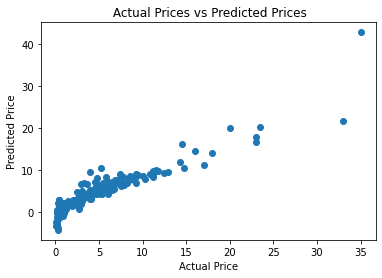

In [53]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

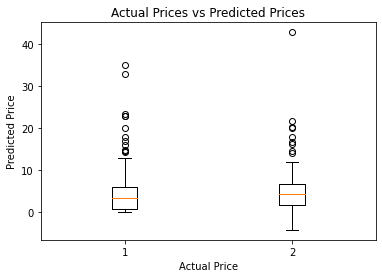

In [51]:
plt.boxplot([Y_train, train_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [54]:
test_data_prediction = lin_reg_model.predict(X_test)

In [56]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8650320546210937


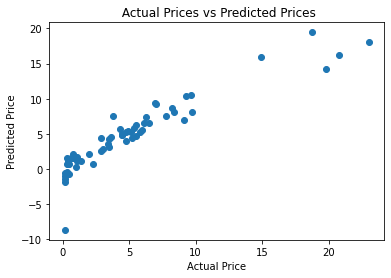

In [57]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

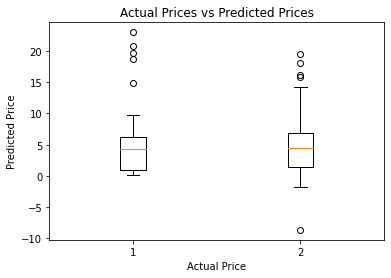

In [59]:
plt.boxplot([Y_test, test_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [60]:
gb_regressor = GradientBoostingRegressor()

In [61]:
gb_regressor.fit(X_train, Y_train)

GradientBoostingRegressor()

In [68]:
gdtrain_data_prediction = gb_regressor.predict(X_train)

In [69]:
error_score = metrics.r2_score(Y_train, gdtrain_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9962842311901805


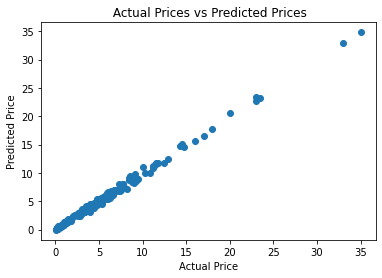

In [70]:
plt.scatter(Y_train, gdtrain_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

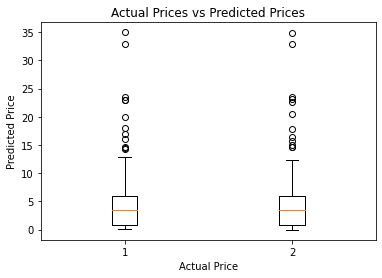

In [71]:
plt.boxplot([Y_train, gdtrain_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [72]:
gdtest_data_prediction = gb_regressor.predict(X_test)

In [73]:
error_score = metrics.r2_score(Y_test, gdtest_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9627955667044003


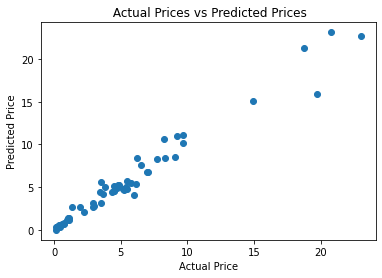

In [74]:
plt.scatter(Y_test, gdtest_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

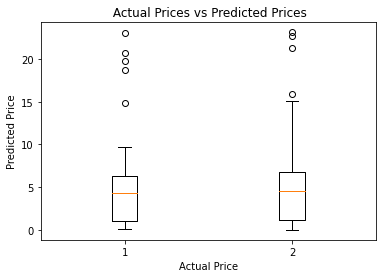

In [76]:
plt.boxplot([Y_test, gdtest_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, Y_train)


RandomForestRegressor()

In [88]:
rftrain_data_prediction = rf_regressor.predict(X_train)

In [89]:
error_score = metrics.r2_score(Y_train, rftrain_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9887370432452762


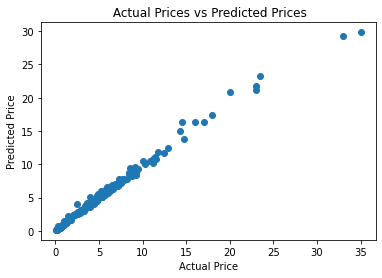

In [92]:
plt.scatter(Y_train, rftrain_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

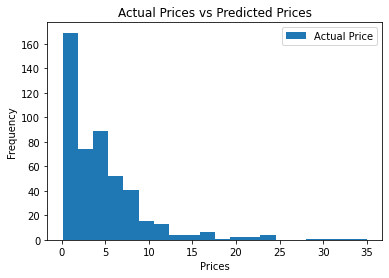

['',
 'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import Lasso\nfrom sklearn import metrics',
 'from sklearn.linear_model import LinearRegression\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.ensemble import RandomForestClassifier',
 'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error',
 "car_data = pd.read_csv('car data.csv')",
 'car_data.head()',
 'car_data.shape',
 'car_data.dtypes',
 'car_data.describe()',
 'car_data.info',
 'car_data.isnull().sum()',
 "car_data['Owner'].value_counts()",
 "car_data['Seller_Type'].value_counts()",
 "car_data['Fuel_Type'].value_counts()",
 '# encoding "Fuel_Type" Column\ncar_data.repl

In [96]:
import numpy as np

combined_values = np.concatenate([Y_train, rftrain_data_prediction])

plt.hist(combined_values, bins=20)  # Adjust the number of bins as needed
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Actual Prices vs Predicted Prices")
plt.legend(["Actual Price", "Predicted Price"])  # Add a legend if desired
plt.show()
In 

In [90]:
rftest_data_prediction = rf_regressor.predict(X_test)

In [91]:
error_score = metrics.r2_score(Y_test, rftest_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9739250563075502


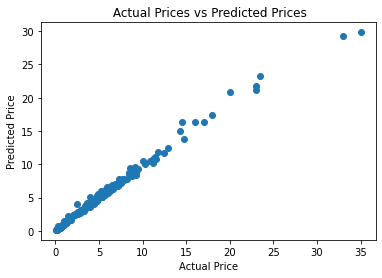

In [95]:
plt.scatter(Y_train, rftrain_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

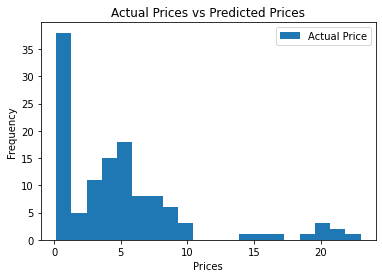

In [97]:
import numpy as np

combined_values = np.concatenate([Y_test, rftest_data_prediction])

plt.hist(combined_values, bins=20)  
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Actual Prices vs Predicted Prices")
plt.legend(["Actual Price", "Predicted Price"])  
plt.show()

In [101]:
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, Y_train)


BayesianRidge()

In [103]:
baytrain_data_prediction = bayesian_reg.predict(X_train)
error_score = metrics.r2_score(Y_train, baytrain_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8736847959867086


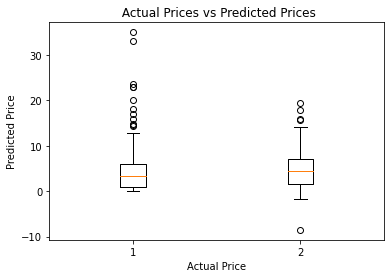

In [106]:
plt.boxplot([Y_train, baytrain_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

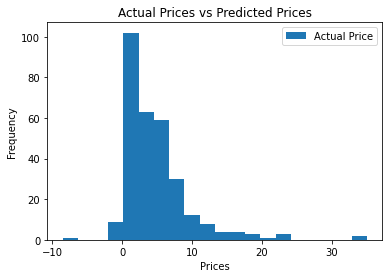

In [109]:
import numpy as np

combined_values = np.concatenate([Y_train, baytrain_data_prediction])

plt.hist(combined_values, bins=20)  
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Actual Prices vs Predicted Prices")
plt.legend(["Actual Price", "Predicted Price"])  
plt.show()

In [105]:
baytest_data_prediction = bayesian_reg.predict(X_test)
error_score = metrics.r2_score(Y_test, baytest_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8640090500636697


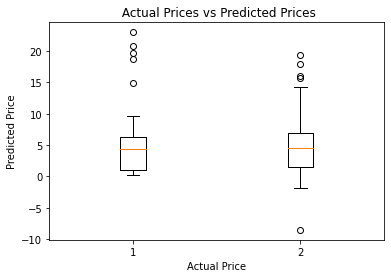

In [107]:
plt.boxplot([Y_test, baytest_data_prediction])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

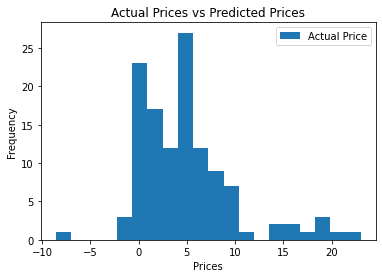

In [108]:
import numpy as np

combined_values = np.concatenate([Y_test, baytest_data_prediction])

plt.hist(combined_values, bins=20)  
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Actual Prices vs Predicted Prices")
plt.legend(["Actual Price", "Predicted Price"])  
plt.show()